In [1]:
import autograd.numpy as ag_np
from train_valid_test_loader import load_train_valid_test_datasets
import matplotlib.pyplot as plt
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import pandas as pd



In [2]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

k_values = [2, 10, 50]
alpha_values = 0
results = []


In [6]:
# train for each combination of k and alpha

# Initialize model
model = CollabFilterOneVectorPerItem(
    n_epochs=120, batch_size=1000, step_size=200,
    n_factors=2, alpha = 0
)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)
valid_perf = model.evaluate_perf_metrics(*valid_tuple)
test_perf = model.evaluate_perf_metrics(*test_tuple)
results.append({
    "valid_MAE": valid_perf['mae'],
    "test_MAE": test_perf['mae']
        
})
print(f"Validation MAE: {valid_perf['mae']}")
print(f"Test MAE: {test_perf['mae']}")


epoch       0.000 | loss_total     0.00351 | train_MAE     1.65330 | valid_MAE     1.66213 | grad_wrt_mu     0.00295 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00214 | train_MAE     1.26747 | valid_MAE     1.27429 | grad_wrt_mu     0.00191 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.00168 | train_MAE     1.01743 | valid_MAE     1.02295 | grad_wrt_mu     0.00129 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.00137 | train_MAE     0.97591 | valid_MAE     0.97908 | grad_wrt_mu     0.00059 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00125 | train_MAE     0

In [8]:

plt.figure()
#epochs = range(len(model.trace_mae_valid))
plt.plot(model.trace_epoch, model.trace_mae_valid, label=f"k={}")
plt.title(f"MAE vs Epochs for alpha= 0")
plt.xlabel("Epoch")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

SyntaxError: f-string: empty expression not allowed (2331460771.py, line 3)

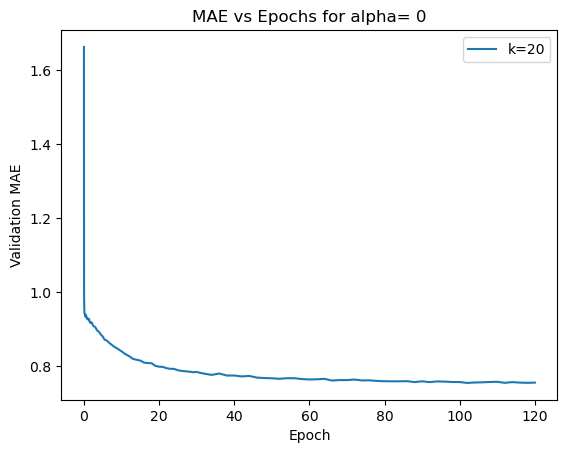

In [9]:

plt.figure()
#epochs = range(len(model.trace_mae_valid))
plt.plot(model.trace_epoch, model.trace_mae_valid, label=f"k={20}")
plt.title(f"MAE vs Epochs for alpha= 0")
plt.xlabel("Epoch")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

Part 1B 

epoch       0.000 | loss_total     0.00344 | train_MAE     1.65330 | valid_MAE     1.66213 | grad_wrt_mu     0.00293 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00272 | train_MAE     1.46157 | valid_MAE     1.46940 | grad_wrt_mu     0.00244 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.00216 | train_MAE     1.30214 | valid_MAE     1.30914 | grad_wrt_mu     0.00194 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.00203 | train_MAE     1.17536 | valid_MAE     1.18170 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00122 | train_MAE     0

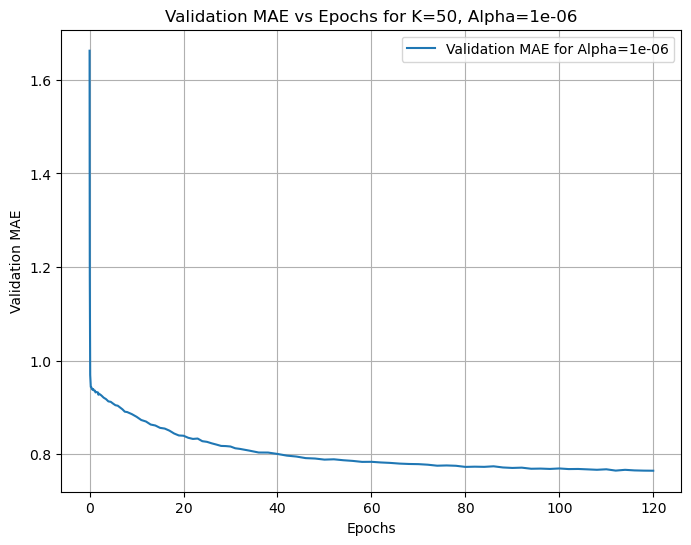

In [ ]:
# Train model for K = 50, alpha > 0
alpha_values = [0.000001, 0.01]
best_alpha = None
best_valid_mae = float('inf')
results_alpha = []

for alpha in alpha_values:
    # Initialize and train model
    model = CollabFilterOneVectorPerItem(
        n_epochs=120, batch_size=1000, step_size=100,
        n_factors=50, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    
    # Evaluate performance
    valid_perf = model.evaluate_perf_metrics(*valid_tuple)
    test_perf = model.evaluate_perf_metrics(*test_tuple)
    
    # Save results
    results_alpha.append({
        "alpha": alpha,
        "valid_MAE": valid_perf['mae'],
        "test_MAE": test_perf['mae'],
        "trace_epoch": model.trace_epoch,
        "trace_mae_valid": model.trace_mae_valid
    })
    
    # Check for best alpha based on validation MAE
    if valid_perf['mae'] < best_valid_mae:
        best_alpha = alpha
        best_valid_mae = valid_perf['mae']

# Print results
print(f"Best Alpha: {best_alpha}")
for result in results_alpha:
    print(f"Alpha: {result['alpha']}, Validation MAE: {result['valid_MAE']}, Test MAE: {result['test_MAE']}")

# Plot validation MAE for the best alpha
for result in results_alpha:
    if result["alpha"] == best_alpha:
        plt.figure(figsize=(8, 6))
        plt.plot(result["trace_epoch"], result["trace_mae_valid"], label=f"Validation MAE for Alpha={best_alpha}")
        plt.title(f"Validation MAE vs Epochs for K=50, Alpha={best_alpha}")
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.legend()
        plt.grid()
        plt.show()


Questions for Office Hours: 
- Why is there almost no difference in performance for when we change k? Part 1 
- All control we have is: step size, num epochs, alpha, k, other implementation is correct? 
- check collab filter implementation 

It seems that alpha in this case only makes things worse, and model performs better as value of alpha decreases.
for k values the model with l= 50 wroks best even though the difference is minimal, I didn;t notice any signs of overfitting
 

In [24]:
#PART 2 SOLUTION HERE! 

import numpy as np
import pandas as pd
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

# ============================================================
# Step 1: Load the development data
# ============================================================
df_dev = pd.read_csv('data_movie_lens_100k/ratings_all_development_set.csv')
reader = Reader(rating_scale=(1,5))

data = Dataset.load_from_df(df_dev[['user_id','item_id','rating']], reader)

# ============================================================
# Step 2: Create a train/validation split for hyperparameter tuning
#      You can also create a separate test split if you like.
# ============================================================
trainset, validset = train_test_split(data, test_size=0.2, random_state=42)

# ============================================================
# Step 3: Hyperparameter tuning with GridSearchCV
#      We'll tune some basic parameters of SVD.
# ============================================================
param_grid = {
    'n_factors': [20, 50],
    'lr_all': [0.01, 0.1, 1, 100],
    'reg_all': [0, 0.1, 1],
    'n_epochs': [50, 100, 120]
}

gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=3, n_jobs=-1, joblib_verbose=10)
gs.fit(data)

print("Best MAE score:", gs.best_score['mae'])
print("Best params:", gs.best_params['mae'])

# ============================================================
# Step 4: Retrain final model on full development set with best params
# ============================================================
best_params = gs.best_params['mae']
algo = SVD(**best_params)
trainset_full = data.build_full_trainset()
algo.fit(trainset_full)

# Optionally, evaluate on the validation set again to confirm performance
preds_valid = algo.test(validset)
mae_val = accuracy.mae(preds_valid, verbose=True)

print(mae_val)

# ============================================================
# Step 5: Predict on the leaderboard set
# ============================================================
df_leaderboard = pd.read_csv('data_movie_lens_100k/ratings_masked_leaderboard_set.csv', usecols=['user_id', 'item_id'])  # Contains user_id, item_id

pred_ratings = []
for _, row in df_leaderboard.iterrows():
    uid = int(row['user_id'])
    iid = int(row['item_id'])
    pred = algo.predict(uid, iid).est
    pred_ratings.append(pred)

pred_ratings = np.array(pred_ratings)

# ============================================================
# Step 6: Save predictions to file
# The predictions should be in the same order as the leaderboard file rows.
# ============================================================
np.savetxt('predicted_ratings_leaderboard.txt', pred_ratings, fmt='%.6f')

print("Predictions saved to predicted_ratings_leaderboard.txt")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  

Best MAE score: 0.7323601218891086
Best params: {'n_factors': 50, 'lr_all': 0.01, 'reg_all': 0.1, 'n_epochs': 50}
MAE:  0.5701
0.5701136521948771
Predictions saved to predicted_ratings_leaderboard.txt


In [23]:
import pandas as pd
import numpy as np
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# ============================================================
# Step 1: Load the development data
# ============================================================
df_dev = pd.read_csv('ratings_all_development_set.csv')
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_dev[['user_id','item_id','rating']], reader)

# Create train/validation split for initial hyperparameter tuning
trainset, validset = train_test_split(data, test_size=0.2, random_state=42)

# ============================================================
# Step 2: Hyperparameter tuning with GridSearchCV on SVD
# (Same as before, no changes here)
# ============================================================
param_grid = {
    'n_factors': [20, 50, 100],
    'lr_all': [0.005, 0.007, 0.01],
    'reg_all': [0.02, 0.05, 0.1],
    'n_epochs': [20, 50]
}

gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=3, n_jobs=-1)
gs.fit(data)

print("Best cross-validation MAE:", gs.best_score['mae'])
print("Best params:", gs.best_params['mae'])

# ============================================================
# Step 3: Retrain final SVD model on the full development set with best params
# (Same as before)
# ============================================================
best_params = gs.best_params['mae']
algo = SVD(**best_params, random_state=42)
trainset_full = data.build_full_trainset()
algo.fit(trainset_full)

# Evaluate on validation set again (for reference)
preds_valid = algo.test(validset)
base_mae = accuracy.mae(preds_valid, verbose=True)  # MAE of best SVD model

# ============================================================
# FROM HERE ON: Integrate New Features (ADDED STEPS)
#
# We'll now incorporate user and item attributes after we've chosen the best SVD model.
# ============================================================

# Extract predictions for train and validation sets
# Note: We have a full trainset_full (no split), but we originally had train/valid. 
# For the hybrid model, let's just use the original validset for evaluation.
# We'll rebuild a "train" set for the ridge model from the full development data.

# The full dev data as testset (user_id, item_id, rating)
full_testset = trainset_full.build_testset()
full_preds = algo.test(full_testset)
df_full_preds = pd.DataFrame([(p.uid, p.iid, p.est, p.r_ui) for p in full_preds],
                             columns=['user_id', 'item_id', 'svd_pred', 'rating'])

# Build a DataFrame for validation predictions (already have preds_valid)
df_valid_preds = pd.DataFrame([(p.uid, p.iid, p.est, p.r_ui) for p in preds_valid],
                              columns=['user_id', 'item_id', 'svd_pred', 'rating'])

# Load user and item side information
df_users = pd.read_csv('user_info.csv')   # user_id, age, gender
df_items = pd.read_csv('item_info.csv')   # item_id, year

# Merge side info into full dev predictions
df_full_merged = df_full_preds.merge(df_users, on='user_id', how='left')
df_full_merged = df_full_merged.merge(df_items, on='item_id', how='left')

df_valid_merged = df_valid_preds.merge(df_users, on='user_id', how='left')
df_valid_merged = df_valid_merged.merge(df_items, on='item_id', how='left')

# Encode gender (if 'M'/'F')
df_full_merged['gender'] = (df_full_merged['gender'] == 'M').astype(int)
df_valid_merged['gender'] = (df_valid_merged['gender'] == 'M').astype(int)

# Features for second-stage model
feature_cols = ['svd_pred', 'age', 'gender', 'year']

X_train = df_full_merged[feature_cols]
y_train = df_full_merged['rating']

X_valid = df_valid_merged[feature_cols]
y_valid = df_valid_merged['rating']

# Train a Ridge model to integrate side features + svd_pred
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

y_valid_pred = ridge.predict(X_valid)
final_mae = mean_absolute_error(y_valid, y_valid_pred)

print("Base SVD model MAE on valid:", base_mae)
print("MAE after incorporating side info:", final_mae)

# ============================================================
# Predict on the leaderboard set with the hybrid model
# ============================================================
df_leaderboard = pd.read_csv('ratings_masked_leaderboard_set.csv')  # user_id,item_id
svd_preds_leaderboard = []
for _, row in df_leaderboard.iterrows():
    uid = int(row['user_id'])
    iid = int(row['item_id'])
    pred = algo.predict(uid, iid).est
    svd_preds_leaderboard.append(pred)
df_leaderboard['svd_pred'] = svd_preds_leaderboard

# Merge user/item info into leaderboard
df_leaderboard = df_leaderboard.merge(df_users, on='user_id', how='left')
df_leaderboard = df_leaderboard.merge(df_items, on='item_id', how='left')

# Encode gender
df_leaderboard['gender'] = (df_leaderboard['gender'] == 'M').astype(int)

X_leaderboard = df_leaderboard[feature_cols]
leaderboard_predictions = ridge.predict(X_leaderboard)

# Save final leaderboard predictions
np.savetxt('predicted_ratings_leaderboard.txt', leaderboard_predictions, fmt='%.6f')
print("Leaderboard predictions saved to predicted_ratings_leaderboard.txt")


FileNotFoundError: [Errno 2] No such file or directory: 'ratings_all_development_set.csv'